In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

Accuracy: 0.7488
Precision: 0.7011
Recall: 0.6854


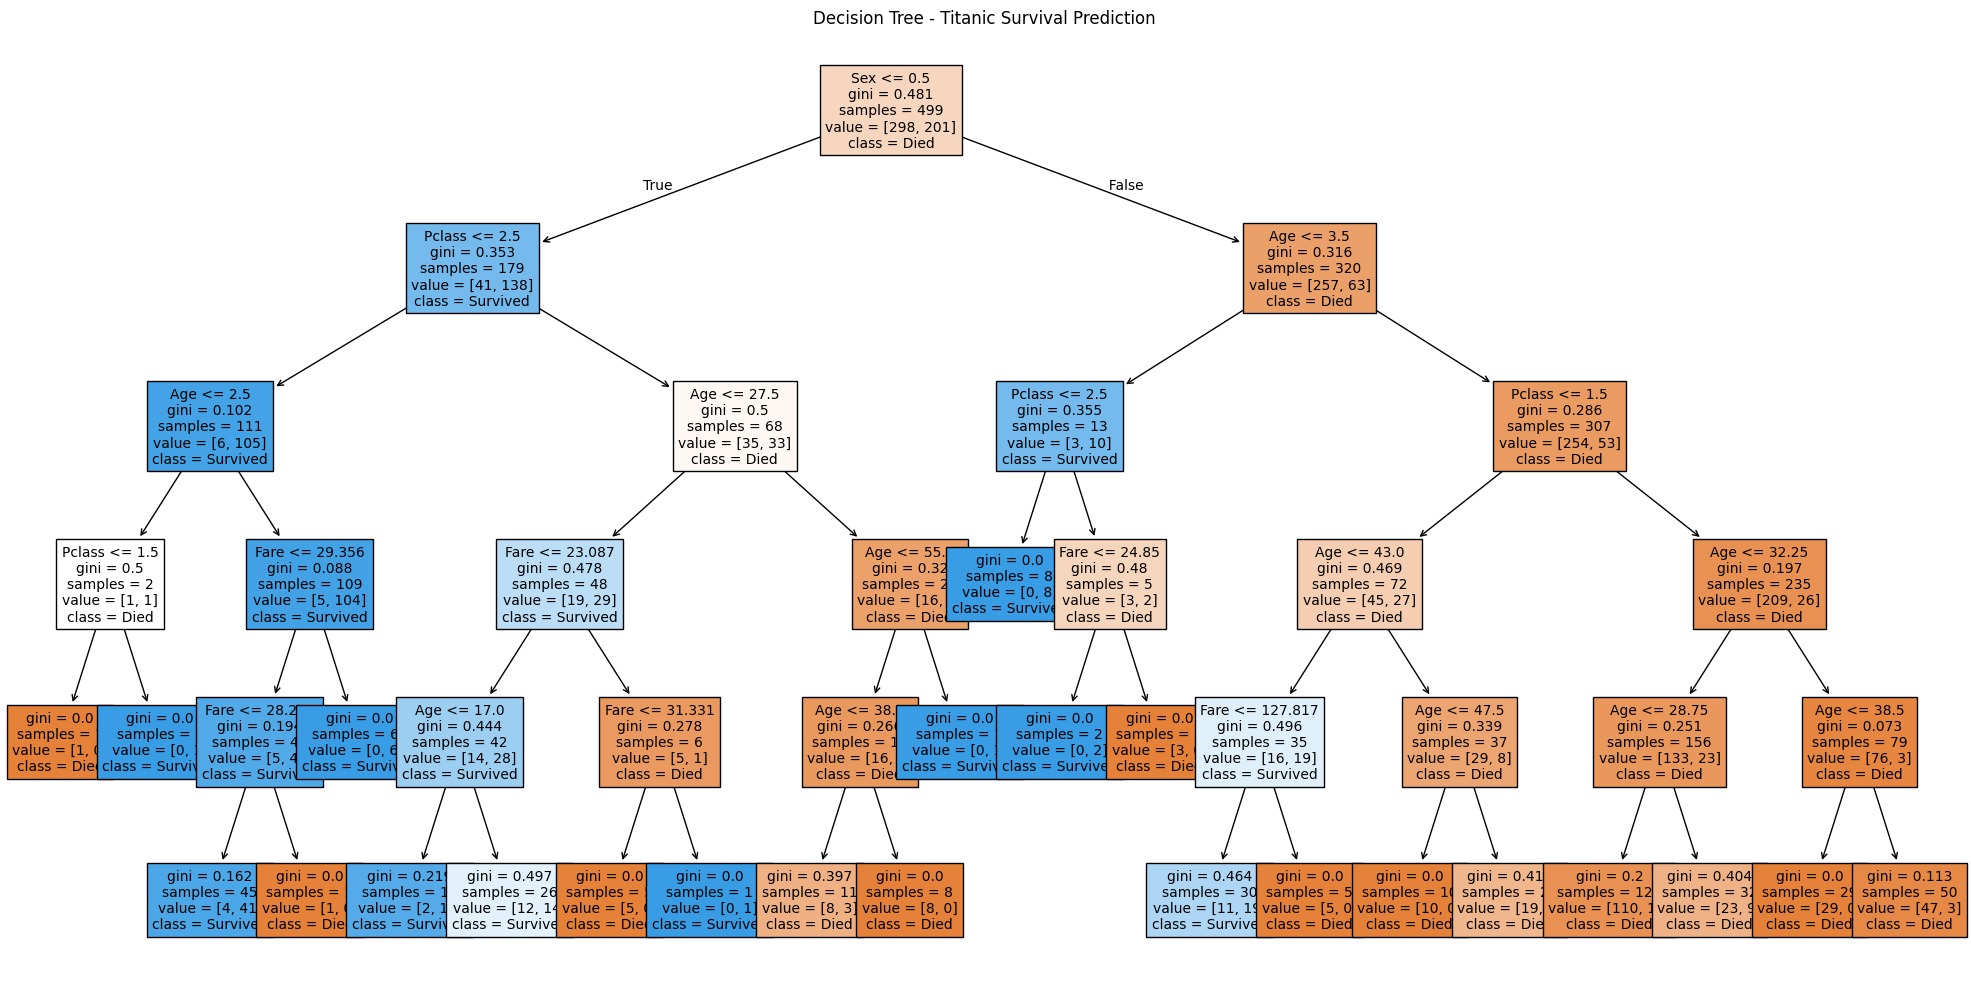


Top feature importance: Sex
  Pclass: 0.2010
  Sex: 0.5277
  Age: 0.1850
  Fare: 0.0864


In [5]:
try:
    dfTitanic = pd.read_csv('train.csv')
    features = ['Pclass', 'Sex', 'Age', 'Fare']
    dfQ5 = dfTitanic[features + ['Survived']].copy()
    dfQ5 = dfQ5.dropna()
    dfQ5['Sex'] = LabelEncoder().fit_transform(dfQ5['Sex'])
    XQ5 = dfQ5[features]
    YQ5 = dfQ5['Survived']
    XTrainQ5, XTestQ5, YTrainQ5, YTestQ5 = train_test_split(XQ5, YQ5, test_size=0.3, random_state=42)
    dtQ5 = DecisionTreeClassifier(max_depth=5, random_state=42)
    dtQ5.fit(XTrainQ5, YTrainQ5)
    yPredictionQ5 = dtQ5.predict(XTestQ5)
    print(f"Accuracy: {accuracy_score(YTestQ5, yPredictionQ5):.4f}")
    print(f"Precision: {precision_score(YTestQ5, yPredictionQ5):.4f}")
    print(f"Recall: {recall_score(YTestQ5, yPredictionQ5):.4f}")
    plt.figure(figsize=(20, 10))
    plot_tree(dtQ5, feature_names=features, class_names=['Died', 'Survived'], filled=True, fontsize=10)
    plt.title('Decision Tree - Titanic Survival Prediction')
    plt.tight_layout()
    plt.savefig('q5DecisionTree.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"\nTop feature importance: {features[np.argmax(dtQ5.feature_importances_)]}")
    for feat, imp in zip(features, dtQ5.feature_importances_):
        print(f"  {feat}: {imp:.4f}")
except FileNotFoundError:
    print("Titanic dataset (train.csv) not found. Please download from Kaggle.")